# Load dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
df = pd.read_csv("data/clean_salary_data.csv")

# Apply nlp on job description

In [3]:
#creae a function to preprocess the text
lemmatizer = WordNetLemmatizer()
def preprocess_text(text) :
    text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words("english")]
    text = " ".join(text)
    return text

In [4]:
#apply preprocessing of text to Job Description column
df["job_desc"] = df["Job Description"].apply(preprocess_text)

In [5]:
#concat all the job_desc strings to find the most used words
desc = ''
for i in range(len(df)) :
    desc += df['job_desc'][i]

In [6]:
#split the words to form a list
desc1 = desc.split(' ')

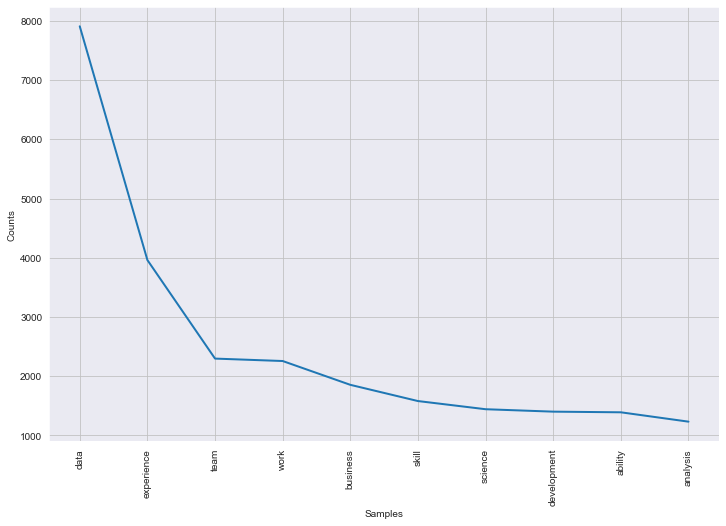

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
#apply FreqDist to count the words
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
nlp_words = nltk.FreqDist(desc1)
nlp_words.plot(10)

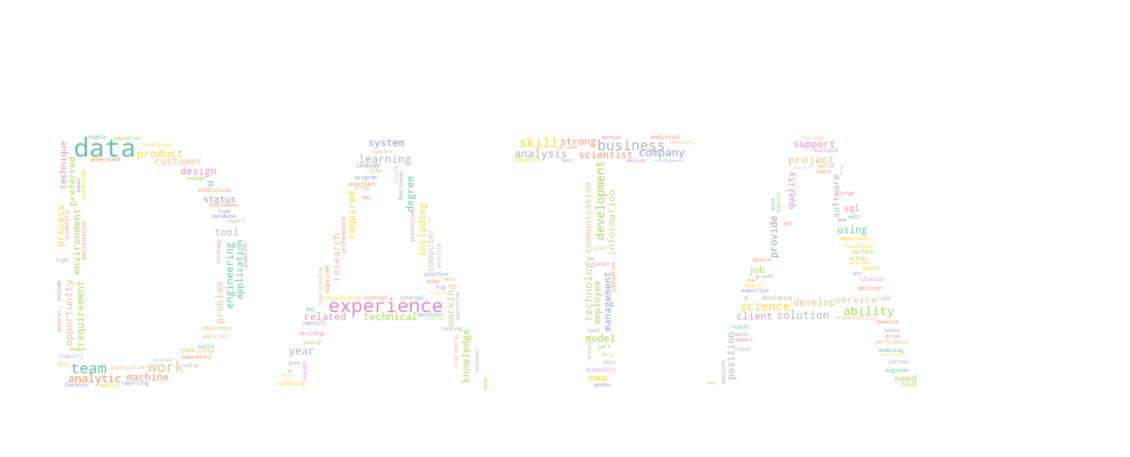

In [9]:
#make word cloud of words used in the job description
mask = np.array(Image.open("images/img2.jpg"))
wordcloud = WordCloud(width = 5000, height = 3000, random_state=1, background_color='white', colormap='Set2', collocations=False,mask=mask).generate(desc)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("images/word_cloud1.png", format="png")
plt.show()

In [10]:
#create a copy of dataframe
df1 = df.copy()

In [11]:
#create columns for different data science skills
skills = ['mathematics', 'python', ' r ', 'machine learning', 'aws', 'cloud', 'excel']
for skill in skills:
    df1[skill] = df1['job_desc'].apply(lambda x: 1 if skill in x else 0)

# Cleaning and Preprocessing

In [12]:
data = df1.copy()

In [13]:
data.shape

(742, 33)

In [14]:
pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 8000)

In [15]:
#create a function to check if a role is for senior or junior
def isSenior(x) :
    senior_val = ['sr.', 'senior', 'lead', 'sr', 'principal', 'director']
    x = x.lower()
    x = x.split(" ")
    senior = 0
    for word in senior_val :
        if word in x :
            senior = 1
            break
    if senior==1 :
        return 1
    else :
        return 0

#apply isSenior function on job title
data['Senior/Junior'] = data['Job Title'].apply(lambda x: isSenior(x))

In [16]:
#check the number of senior and junior values
data['Senior/Junior'].value_counts()

0    520
1    222
Name: Senior/Junior, dtype: int64

In [17]:
#convert the job titles in a broader category of Data Scientist, Data Engineer and Data Analyst
def role(x):
    x = x.lower()
    if 'scientist' in x or 'science' in x:
        return 'Data Scientist'
    elif 'engineer' in x :
        return 'Data Engineer'
    elif 'analyst' in x or 'analytics' in x:
        return 'Data Analyst'
    else :
        return 'Other Data Roles'
        
data['Role'] = data['Job Title'].apply(lambda x: role(x))

In [18]:
#find the number of positions for different roles 
data['Role'].value_counts()

Data Scientist      472
Data Engineer       139
Data Analyst        119
Other Data Roles     12
Name: Role, dtype: int64

In [19]:
#find no of competitors for each compnay/organization
data['No of competitors'] = data['Competitors'].apply(lambda x: 0 if x=='-1' else len(x.split(',')))

In [20]:
#Correct the name of companies
data['Company'] = data['Company'].apply(lambda x: x.replace('\n', ''))

In [21]:
#Convert Los Angeles to LA
data['Location'] = data['Location'].apply(lambda x: x.replace('Los Angeles', 'LA'))

In [22]:
#check if the location and headquarters are in the same state
data['Loc==HQ'] = data.apply(lambda x: 1 if x.Location==x.Headquarters else 0, axis=1)

In [23]:
#configure the size(no of employees) column
data['Size'] = data['Size'].apply(lambda x: x.replace('to', '-').replace('employees', ''))
data['Size'] = data['Size'].apply(lambda x: x.replace('-1', 'Unknown'))
data['Size'].value_counts()

1001 - 5000      150
501 - 1000       134
10000+           130
201 - 500        117
51 - 200          94
5001 - 10000      76
1 - 50            31
Unknown           10
Name: Size, dtype: int64

In [24]:
#configure Revenue column
data['Revenue'] = data['Revenue'].apply(lambda x: x.replace('-1', 'Unknown / Non-Applicable').replace('to', '-').replace('(USD)', ''))
data['Revenue'].value_counts()

Unknown / Non-Applicable      204
$10+ billion                  124
$100 - $500 million            91
$1 - $2 billion                60
$500 million - $1 billion      57
$50 - $100 million             46
$25 - $50 million              40
$2 - $5 billion                39
$10 - $25 million              32
$5 - $10 billion               19
$5 - $10 million               18
$1 - $5 million                 8
Less than $1 million            4
Name: Revenue, dtype: int64

In [25]:
#removing some unnecessary columns columns
data = data.drop(['Job Title', 'Job Description', 'Competitors', 'job_desc'], axis=1)

# EDA

In [26]:
dfEDA = data.copy()

In [28]:
dfEDA.head()

,Rating,Location,Headquarters,Size,Type of ownership,Sector,Revenue,Employer Provided Salary,Salary Per Hour,min salary,max salary,mean salary,Company,age,Company - Private,Company - Public,Government,Hospital,Nonprofit Organization,Other Organization,Subsidiary or Business Segment,le_sectors,mathematics,python,r,machine learning,aws,cloud,excel,Senior/Junior,Role,No of competitors,Loc==HQ
0,3.8,NM,CA,501 - 1000,Company - Private,Aerospace & Defense,$50 - $100 million,0,0,53,91,72.0,Tecolote Research,47,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,Data Scientist,0,0
1,3.4,MD,MD,10000+,Other Organization,Health Care,$2 - $5 billion,0,0,63,112,87.5,University of Maryland Medical System,36,0,0,0,0,0,1,0,5,1,1,1,1,0,0,0,0,Data Scientist,0,1
2,4.8,FL,FL,501 - 1000,Company - Private,Business Services,$100 - $500 million,0,0,80,90,85.0,KnowBe4,10,1,0,0,0,0,0,0,2,1,1,1,1,0,0,1,0,Data Scientist,0,1
3,3.8,WA,WA,1001 - 5000,Government,Other Sectors,$500 million - $1 billion,0,0,56,97,76.5,PNNL,55,0,0,1,0,0,0,0,9,1,1,0,1,0,0,0,0,Data Scientist,3,1
4,2.9,NY,NY,51 - 200,Company - Private,Business Services,Unknown / Non-Applicable,0,0,86,143,114.5,Affinity Solutions,22,1,0,0,0,0,0,0,2,1,1,1,1,0,1,1,0,Data Scientist,3,1


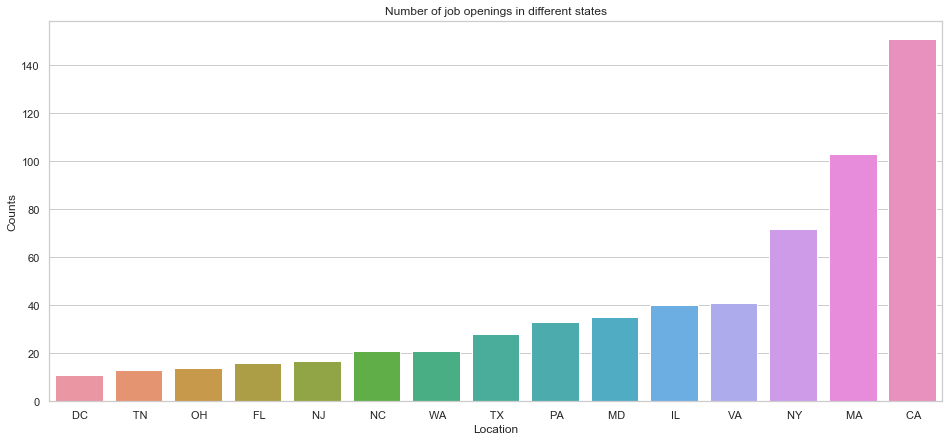

In [29]:
#Location column count plot
loc_counts = dfEDA.Location.value_counts().sort_values()[-15:].reset_index()
plt.figure(figsize=(16,7))
sns.set_theme(style="whitegrid")
sns.barplot(data = loc_counts, x='index', y='Location')
plt.xlabel('Location')
plt.ylabel('Counts')
plt.title('Number of job openings in different states')
plt.savefig('images/location.png', format='png')
plt.show()

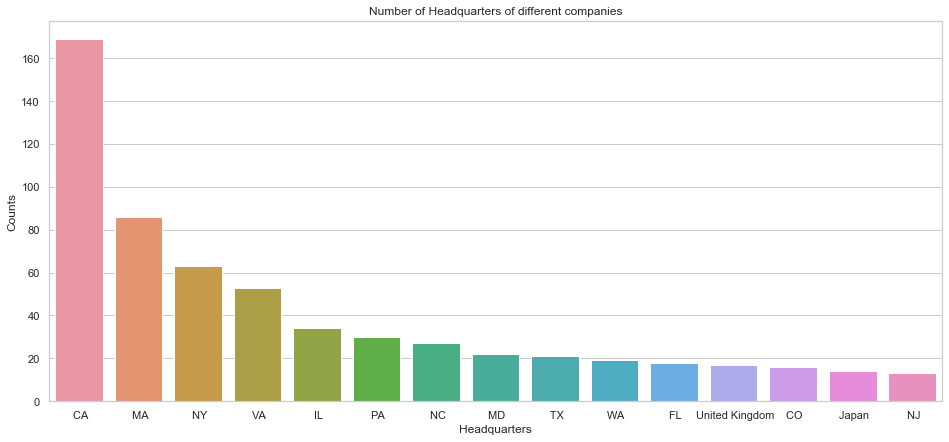

In [30]:
#Headquarters column count plot
hq_counts = dfEDA.Headquarters.value_counts().sort_values(ascending=False)[:15].reset_index()
plt.figure(figsize=(16,7))
sns.set_theme(style="whitegrid")
sns.barplot(data = hq_counts, x='index', y='Headquarters')
plt.xlabel('Headquarters')
plt.ylabel('Counts')
plt.title('Number of Headquarters of different companies')
plt.savefig('images/hq.png', format='png')
plt.show()

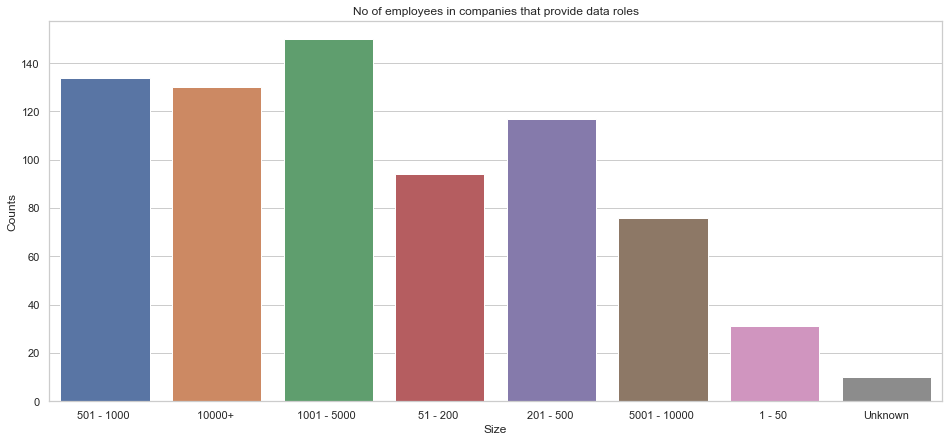

In [31]:
#size column count plot
plt.figure(figsize=(16,7))
sns.set_theme(style="whitegrid")
sns.countplot(data = dfEDA, x='Size')
plt.xlabel('Size')
plt.ylabel('Counts')
plt.title('No of employees in companies that provide data roles')
plt.savefig('images/size.png', format='png')
plt.show()

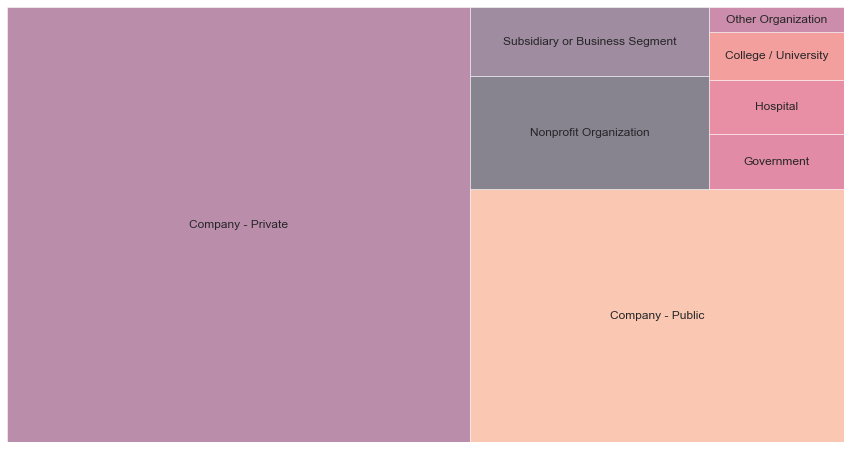

In [32]:
ownership_counts = dfEDA['Type of ownership'].value_counts().reset_index()
ownership_counts.columns = ['Type of ownership', 'Counts']
a = list(ownership_counts['Type of ownership'])
b = list(ownership_counts['Counts'])
plt.figure(figsize=(15,8))
squarify.plot(sizes=b,label=a, alpha=.5, pad=0)
plt.axis('off')
plt.savefig('images/ownership.png', format='png')
plt.show()

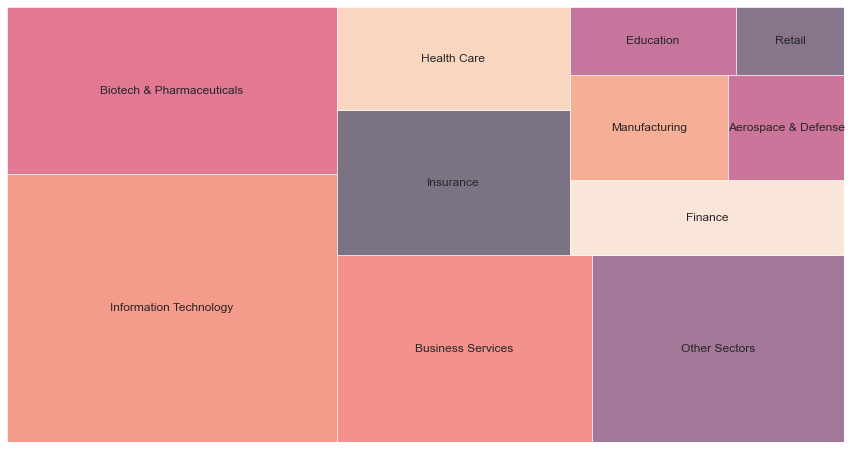

In [33]:
sector_counts = dfEDA['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Counts']
a = list(sector_counts['Sector'])
b = list(sector_counts['Counts'])
plt.figure(figsize=(15,8))
squarify.plot(sizes=b,label=a, alpha=.6, pad=0)
plt.axis('off')
plt.savefig('images/sector.png', format='png')
plt.show()

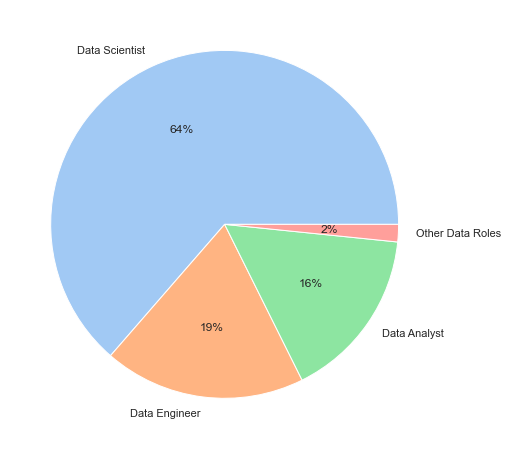

In [34]:
role_counts = dfEDA['Role'].value_counts().reset_index()
role_counts.columns = ['Role', 'Counts']
a = list(role_counts.Role)
b = list(role_counts.Counts)

plt.figure(figsize=(8,8))
palette_color = sns.color_palette('pastel')
plt.pie(x=b, labels=a, colors=palette_color, autopct='%.0f%%')
plt.savefig('images/role.png', format='png')
plt.show()

In [35]:
#save clean eda data 
dfEDA.to_csv('data/clean_eda_salary_data.csv')